In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Data Load

In [2]:
X_train = pd.read_csv('02/train_x_2.csv')

In [3]:
X_train.head()

,ID,fever,bodypain,age,runnynose,diffbreath
0,1,99.329862,0,26,1,-1
1,2,98.115263,1,61,1,0
2,3,99.918088,1,13,0,-1
3,4,101.344456,1,55,1,0
4,5,100.056678,1,37,0,1


In [4]:
y_train= pd.read_csv('02/train_y_2.csv')

In [5]:
y_train.head()

,ID,infected
0,1,0
1,2,1
2,3,0
3,4,1
4,5,0


In [6]:
test_X= pd.read_csv('02/test_x_2.csv')

In [7]:
test_X.head()

,ID,fever,bodypain,age,runnynose,diffbreath
0,1501,98.946958,1,35,1,1
1,1502,99.746078,0,38,1,1
2,1503,102.552184,1,69,1,0
3,1504,99.323104,1,28,1,0
4,1505,101.657201,0,65,0,-1


In [8]:
test_index = test_X['ID']

In [9]:
df = pd.merge(X_train, y_train, on='ID', how='inner')

In [10]:
df.head()

,ID,fever,bodypain,age,runnynose,diffbreath,infected
0,1,99.329862,0,26,1,-1,0
1,2,98.115263,1,61,1,0,1
2,3,99.918088,1,13,0,-1,0
3,4,101.344456,1,55,1,0,1
4,5,100.056678,1,37,0,1,0


# EDA 

* 데이터에 존재하는 특성 찾기

In [11]:
df['infected'].value_counts()

0    753
1    747
Name: infected, dtype: int64

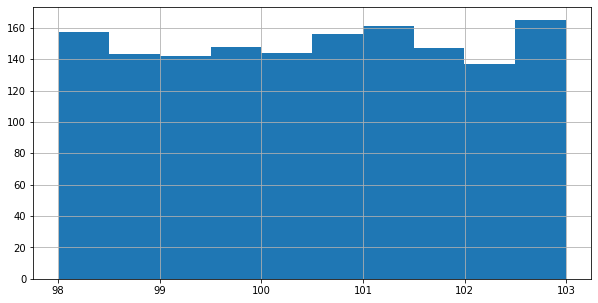

In [12]:
plt.figure(figsize=(10, 5))
df['fever'].hist()
plt.show()

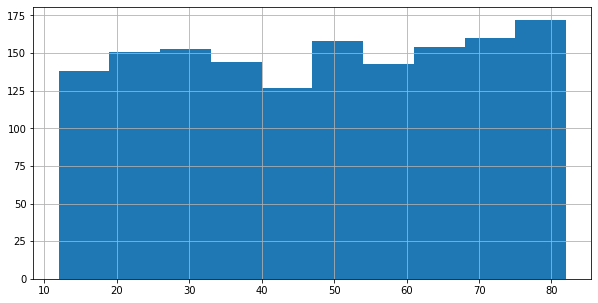

In [13]:
plt.figure(figsize=(10, 5))
df['age'].hist()
plt.show()

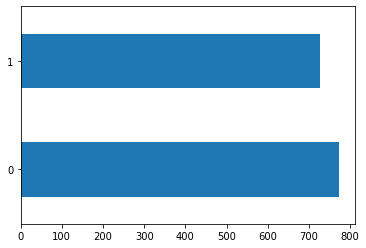

In [14]:
plt.figure()
df['bodypain'].value_counts().plot(kind='barh')
plt.show()

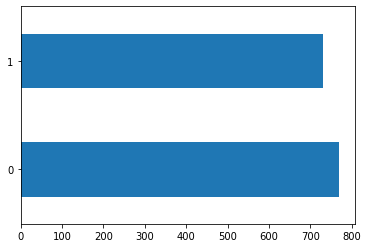

In [15]:
plt.figure()
df['runnynose'].value_counts().plot(kind='barh')
plt.show()

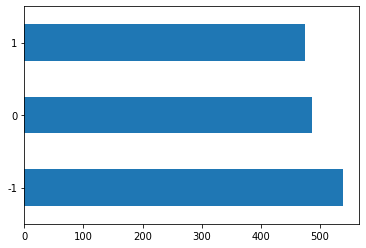

In [16]:
plt.figure()
df['diffbreath'].value_counts().plot(kind='barh')
plt.show()

* 변수들 끼리의 상관관계 확인

In [17]:
df.corr()

,ID,fever,bodypain,age,runnynose,diffbreath,infected
ID,1.000000,0.002903,-0.038433,0.019296,-0.032294,0.020130,0.005855
fever,0.002903,1.000000,0.014202,0.038617,0.002352,-0.016318,-0.008533
bodypain,-0.038433,0.014202,1.000000,-0.010189,0.009822,0.007250,0.003874
age,0.019296,0.038617,-0.010189,1.000000,-0.009215,-0.038057,0.074302
runnynose,-0.032294,0.002352,0.009822,-0.009215,1.000000,-0.010348,-0.036120
diffbreath,0.020130,-0.016318,0.007250,-0.038057,-0.010348,1.000000,0.002226
infected,0.005855,-0.008533,0.003874,0.074302,-0.036120,0.002226,1.000000


<AxesSubplot:>

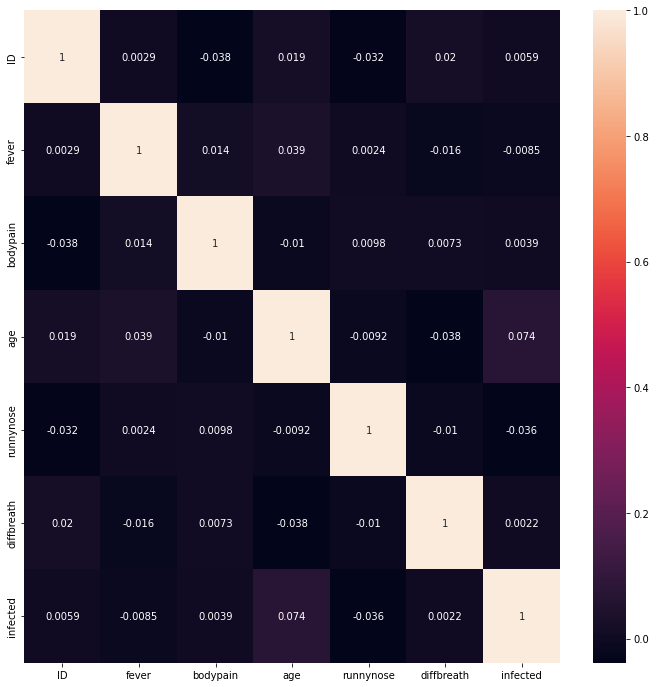

In [18]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(),annot = True)

* 독립변수와 종속변수의 관계

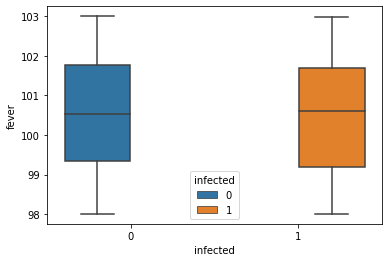

In [19]:
sns.boxplot(x='infected', y="fever", hue="infected", data=df)
plt.show()

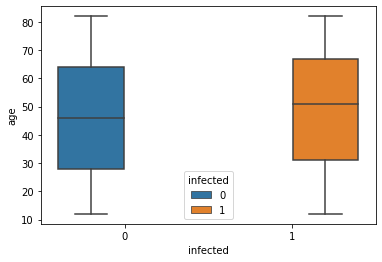

In [20]:
sns.boxplot(x='infected', y="age", hue="infected", data=df)
plt.show()

<AxesSubplot:xlabel='infected', ylabel='count'>

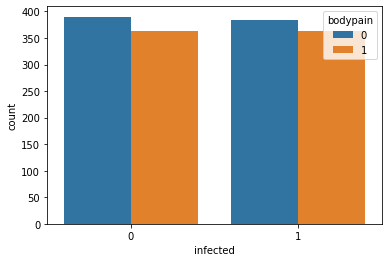

In [21]:
sns.countplot(x='infected', hue='bodypain', data=df)

<AxesSubplot:xlabel='infected', ylabel='count'>

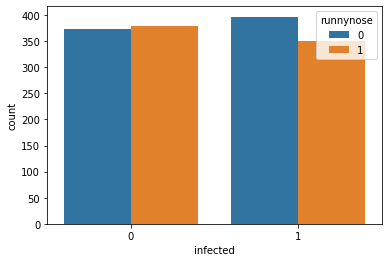

In [22]:
sns.countplot(x='infected', hue='runnynose', data=df)

<AxesSubplot:xlabel='infected', ylabel='count'>

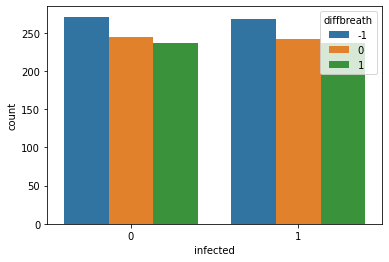

In [23]:
sns.countplot(x='infected', hue='diffbreath', data=df)

# Modeling 

* 범주형 데이터 처리

In [24]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [25]:
df.head()

,ID,fever,bodypain,age,runnynose,diffbreath,infected
0,1,99.329862,0,26,1,-1,0
1,2,98.115263,1,61,1,0,1
2,3,99.918088,1,13,0,-1,0
3,4,101.344456,1,55,1,0,1
4,5,100.056678,1,37,0,1,0


In [26]:
df['bodypain']=label_encoder.fit_transform(df['bodypain'])
df['runnynose']=label_encoder.fit_transform(df['runnynose'])
df['diffbreath']=label_encoder.fit_transform(df['diffbreath'])

In [27]:
bp_oh = pd.get_dummies(df['bodypain'], prefix='bodypain')
rn_oh = pd.get_dummies(df['runnynose'], prefix='runnynose')
db_oh = pd.get_dummies(df['diffbreath'], prefix='diffbreath')

In [28]:
df.head()

,ID,fever,bodypain,age,runnynose,diffbreath,infected
0,1,99.329862,0,26,1,0,0
1,2,98.115263,1,61,1,1,1
2,3,99.918088,1,13,0,0,0
3,4,101.344456,1,55,1,1,1
4,5,100.056678,1,37,0,2,0


In [29]:
df = df.drop(['runnynose', 'bodypain', 'diffbreath'], axis=1)

In [30]:
df.head()

,ID,fever,age,infected
0,1,99.329862,26,0
1,2,98.115263,61,1
2,3,99.918088,13,0
3,4,101.344456,55,1
4,5,100.056678,37,0


In [31]:
df = pd.concat([df, bp_oh, rn_oh, db_oh], axis=1)

In [32]:
df.head()

,ID,fever,age,infected,bodypain_0,bodypain_1,runnynose_0,runnynose_1,diffbreath_0,diffbreath_1,diffbreath_2
0,1,99.329862,26,0,1,0,0,1,1,0,0
1,2,98.115263,61,1,0,1,0,1,0,1,0
2,3,99.918088,13,0,0,1,1,0,1,0,0
3,4,101.344456,55,1,0,1,0,1,0,1,0
4,5,100.056678,37,0,0,1,1,0,0,0,1


In [33]:
y_train = np.array(df['infected'])

In [34]:
y_train

array([0, 1, 0, ..., 1, 0, 0])

In [35]:
X_train = df.drop(['ID', 'infected'], axis=1)

In [36]:
X_train.head()

,fever,age,bodypain_0,bodypain_1,runnynose_0,runnynose_1,diffbreath_0,diffbreath_1,diffbreath_2
0,99.329862,26,1,0,0,1,1,0,0
1,98.115263,61,0,1,0,1,0,1,0
2,99.918088,13,0,1,1,0,1,0,0
3,101.344456,55,0,1,0,1,0,1,0
4,100.056678,37,0,1,1,0,0,0,1


In [37]:
X_train = np.array(X_train)

* 학습용과 검증용 분리

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                   test_size=0.2, random_state=42)

In [39]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1200, 9) (1200,) (300, 9) (300,)


In [40]:
y_train

array([1, 1, 1, ..., 1, 0, 1])

* test 동일하게 처리

In [41]:
test_X.head()

,ID,fever,bodypain,age,runnynose,diffbreath
0,1501,98.946958,1,35,1,1
1,1502,99.746078,0,38,1,1
2,1503,102.552184,1,69,1,0
3,1504,99.323104,1,28,1,0
4,1505,101.657201,0,65,0,-1


In [42]:
test_X['bodypain']=label_encoder.fit_transform(test_X['bodypain'])
test_X['runnynose']=label_encoder.fit_transform(test_X['runnynose'])
test_X['diffbreath']=label_encoder.fit_transform(test_X['diffbreath'])

In [43]:
bp_oh = pd.get_dummies(test_X['bodypain'], prefix='bodypain')
rn_oh = pd.get_dummies(test_X['runnynose'], prefix='runnynose')
db_oh = pd.get_dummies(test_X['diffbreath'], prefix='diffbreath')

In [44]:
test_X = test_X.drop(['runnynose', 'bodypain', 'diffbreath'], axis=1)

In [45]:
df_test = pd.concat([test_X, bp_oh, rn_oh, db_oh], axis=1)

In [46]:
df_test.head()

,ID,fever,age,bodypain_0,bodypain_1,runnynose_0,runnynose_1,diffbreath_0,diffbreath_1,diffbreath_2
0,1501,98.946958,35,0,1,0,1,0,0,1
1,1502,99.746078,38,1,0,0,1,0,0,1
2,1503,102.552184,69,0,1,0,1,0,1,0
3,1504,99.323104,28,0,1,0,1,0,1,0
4,1505,101.657201,65,1,0,1,0,1,0,0


## Decision Tree

In [47]:
dt_clf = DecisionTreeClassifier(random_state=42)

* 튜닝없이 예측

In [48]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
dt_preds = dt_clf.predict(X_test)

In [50]:
dt_preds

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1])

In [51]:
accuracy_score(y_test, dt_preds)

0.5133333333333333

In [52]:
f1_score(y_test, dt_preds)

0.4785714285714286

* 하이퍼 파라미터를 튜닝하면서 학습

In [53]:
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [5, 10, 20],
    'max_features': [3, 6],
    'max_leaf_nodes': [2, 3, 4],
    'min_impurity_decrease': np.arange(0, 0.1, 0.005),
}

cv = KFold(n_splits=10, random_state=42, shuffle=True)
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='f1', cv=cv, n_jobs=1)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 3, 'max_leaf_nodes': 4, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
0.5554741324370716


In [54]:
dt_preds = grid_cv.predict(X_test)

In [55]:
f1_score(y_test, dt_preds)

0.592391304347826

## K-Nearest Neighbors

In [56]:
neigh_clf = KNeighborsClassifier(n_neighbors=5)

In [57]:
neigh_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [58]:
neigh_preds = neigh_clf.predict(X_test)

In [59]:
accuracy_score(y_test, neigh_preds)

0.5433333333333333

In [60]:
f1_score(y_test, neigh_preds)

0.5355932203389832

* 하이퍼파라미터를 튜닝하면서 학습

In [61]:
params = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [5, 10, 30, 50],
    'p': [1, 2]
}

cv = KFold(n_splits=10, random_state=42, shuffle=True)
grid_cv = GridSearchCV(neigh_clf, param_grid=params, scoring='f1', cv=cv, n_jobs=1)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.5097353764569206


In [62]:
neigh_preds = grid_cv.predict(X_test)

In [63]:
f1_score(y_test, neigh_preds)

0.5364238410596027

## Logistic Regression

In [64]:
lr_clf = LogisticRegression(random_state=42)

In [65]:
lr_clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [66]:
lr_clf_preds = lr_clf.predict(X_test)

In [67]:
accuracy_score(y_test, lr_clf_preds)

0.49666666666666665

In [68]:
f1_score(y_test, lr_clf_preds)

0.488135593220339

In [69]:
params = {
    'max_iter': [30, 50, 100, 200, 300],
    'l1_ratio' : [0, 0.5, 1]
}

cv = KFold(n_splits=10, random_state=42, shuffle=True)
grid_cv = GridSearchCV(lr_clf, param_grid=params, scoring='f1', cv=cv, n_jobs=1)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'l1_ratio': 0, 'max_iter': 30}
0.5260872235735214


### 전체 데이터로 각 모델 학습 후 test 예측

* data concat

In [70]:
X_train = pd.DataFrame(X_train) ; X_train.head()

,0,1,2,3,4,5,6,7,8
0,100.911664,24.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,102.664739,59.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,102.727184,72.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,99.297883,41.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,98.526827,53.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [71]:
X_test = pd.DataFrame(X_test) ; X_test.head()

,0,1,2,3,4,5,6,7,8
0,99.626868,34.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,99.592285,80.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,100.852638,52.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,100.995440,35.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,99.607772,40.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [72]:
df = pd.concat([X_train, X_test], axis=0)

In [73]:
y_train = pd.DataFrame(y_train) ; y_train.head()

,0
0,1
1,1
2,1
3,0
4,1


In [74]:
y_test = pd.DataFrame(y_test) ; y_test.head()

,0
0,0
1,1
2,0
3,0
4,1


In [75]:
y_train = pd.concat([y_train, y_test], axis=0) ;y_train

,0
0,1
1,1
2,1
3,0
4,1
...,...
295,0
296,0
297,0
298,0


In [76]:
X_train = np.array(df) ; X_train

array([[100.9116636 ,  24.        ,   0.        , ...,   1.        ,
          0.        ,   0.        ],
       [102.6647393 ,  59.        ,   0.        , ...,   1.        ,
          0.        ,   0.        ],
       [102.7271845 ,  72.        ,   0.        , ...,   1.        ,
          0.        ,   0.        ],
       ...,
       [102.6250271 ,  68.        ,   1.        , ...,   1.        ,
          0.        ,   0.        ],
       [101.0119826 ,  74.        ,   0.        , ...,   0.        ,
          0.        ,   1.        ],
       [ 99.68935601,  58.        ,   1.        , ...,   0.        ,
          0.        ,   1.        ]])

In [77]:
y_train = np.array(y_train) ;y_train

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [78]:
test_X = df_test.drop(['ID'], axis=1)

In [79]:
test_X = np.array(test_X)

* DecisionTree

In [80]:
dt = DecisionTreeClassifier(random_state=42, criterion = 'gini'
                                , max_depth = 4, max_features = 3
                                , max_leaf_nodes = 4, min_impurity_decrease = 0.0,
                                min_samples_leaf = 1, min_samples_split = 5,
                                splitter = 'random')

In [81]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=3, max_leaf_nodes=4,
                       min_samples_split=5, random_state=42, splitter='random')

In [82]:
dt_test = dt.predict(test_X)

In [83]:
test_index = pd.DataFrame(test_index) ; test_index.head()

,ID
0,1501
1,1502
2,1503
3,1504
4,1505


In [84]:
dt_test = pd.DataFrame(dt_test) ; dt_test.head()

,0
0,0
1,0
2,1
3,0
4,1


* K-Nearest Neighbors

In [85]:
KN = KNeighborsClassifier(algorithm = 'auto', leaf_size = 5,
                          n_neighbors = 5, p = 1, weights = 'uniform')

In [86]:
KN.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=5, p=1)

In [87]:
KN_test = KN.predict(test_X)

In [88]:
KN_test = pd.DataFrame(KN_test) ; KN_test.head()

,0
0,1
1,0
2,0
3,1
4,1


In [89]:
result = pd.concat([test_index, dt_test, KN_test], axis=1) ; result

,ID,0,0
0,1501,0,1
1,1502,0,0
2,1503,1,0
3,1504,0,1
4,1505,1,1
...,...,...,...
494,1995,0,0
495,1996,1,1
496,1997,1,1
497,1998,1,1


* Logistic Regression

In [90]:
lr = LogisticRegression(random_state=42, l1_ratio = 0, max_iter = 30)

In [91]:
lr.fit(X_train, y_train)

LogisticRegression(l1_ratio=0, max_iter=30, random_state=42)

In [92]:
lr_test = lr.predict(test_X)

In [93]:
lr_test = pd.DataFrame(lr_test) ; lr_test.head()

,0
0,0
1,0
2,1
3,0
4,1


In [94]:
result = pd.concat([result, lr_test], axis=1) ; result

,ID,0,0,0
0,1501,0,1,0
1,1502,0,0,0
2,1503,1,0,1
3,1504,0,1,0
4,1505,1,1,1
...,...,...,...,...
494,1995,0,0,0
495,1996,1,1,1
496,1997,1,1,1
497,1998,1,1,1


In [95]:
result.columns = ['데이터 ID', 'DT 예측', 'KNN 예측', 'LR 예측']

In [96]:
result

,데이터 ID,DT 예측,KNN 예측,LR 예측
0,1501,0,1,0
1,1502,0,0,0
2,1503,1,0,1
3,1504,0,1,0
4,1505,1,1,1
...,...,...,...,...
494,1995,0,0,0
495,1996,1,1,1
496,1997,1,1,1
497,1998,1,1,1


In [97]:
result.to_csv('classification.csv', index=False)